In [17]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import cartopy.feature as cfeature
import cartopy.mpl.gridliner as gridliner
from scipy.ndimage import gaussian_filter
import geopandas as gpd
import warnings
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
import matplotlib.patches as mpatches
import os
import matplotlib.ticker as mticker



warnings.filterwarnings("ignore")


In [18]:
import os
import xarray as xr

def annual_anom_pliomip2(filename_lgm, filename_pi, variable):
    print(f"Processing files: {filename_lgm} and {filename_pi}")
    
    # Load datasets
    ds_plio = xr.open_dataset(filename_lgm)
    ds_pi = xr.open_dataset(filename_pi)
    print(f"Datasets loaded. LGM Dimensions: {ds_plio.dims}, PI Dimensions: {ds_pi.dims}")

    # Drop the 'height' coordinate if it exists
    if 'height' in ds_plio.coords:
        ds_plio = ds_plio.drop_vars('height')
        print("Dropped 'height' coordinate in LGM dataset.")
    if 'height' in ds_pi.coords:
        ds_pi = ds_pi.drop_vars('height')
        print("Dropped 'height' coordinate in PI dataset.")

    # Define lat/lon boundaries
    upper_lat = 45
    lower_lat = 15
    left_lon = 70
    right_lon = 105

    # Select the data within the specified latitude and longitude range
    ds_plio_selected = ds_plio.sel(lat=slice(lower_lat, upper_lat), lon=slice(left_lon, right_lon))
    ds_pi_selected = ds_pi.sel(lat=slice(lower_lat, upper_lat), lon=slice(left_lon, right_lon))
    print(f"Data selected for lat/lon range: lat={lower_lat} to {upper_lat}, lon={left_lon} to {right_lon}")

    # Check for 'time' or 'month' dimension and calculate the mean accordingly
    if 'time' in ds_plio_selected.dims and 'time' in ds_pi_selected.dims:
        print("Averaging over 'time' dimension for both LGM and PI datasets.")
        variable_plio = ds_plio_selected[variable].mean(dim='time') - 273.15
        variable_pi = ds_pi_selected[variable].mean(dim='time') - 273.15
    elif 'month' in ds_plio_selected.dims and 'month' in ds_pi_selected.dims:
        print("Averaging over 'month' dimension for both LGM and PI datasets.")
        variable_plio = ds_plio_selected[variable].mean(dim='month') - 273.15
        variable_pi = ds_pi_selected[variable].mean(dim='month') - 273.15
    else:
        raise ValueError("Neither 'time' nor 'month' dimension found in the datasets.")

    # Compute the difference between the two datasets
    try:
        difference = variable_plio - variable_pi
    except ValueError as e:
        print(f"Error while computing the difference between {filename_lgm} and {filename_pi}: {e}")
        raise

    print(f"Finished processing files: {filename_lgm} and {filename_pi}")
    return difference

# Base directories for the files
plio_directories = [
    '/Users/alexaterrazas/Desktop/PlioMIP2/tas/CESM/midPliocene/regridded_files/',
    '/Users/alexaterrazas/Desktop/PlioMIP2/tas/EC-Earth3/midPliocene/regridded_files/',
    '/Users/alexaterrazas/Desktop/PlioMIP2/tas/GISS/midPliocene/regridded_files/',
    '/Users/alexaterrazas/Desktop/PlioMIP2/tas/HadGEM3/midPliocene/regridded_files/',
    '/Users/alexaterrazas/Desktop/PlioMIP2/tas/IPSL/midPliocene/regridded_files/',
    '/Users/alexaterrazas/Desktop/PlioMIP2/tas/NorESM/midPliocene/regridded_files/',
]

pi_directories = [
    '/Users/alexaterrazas/Desktop/PlioMIP2/tas/CESM/piControl/regridded_files/',
    '/Users/alexaterrazas/Desktop/PlioMIP2/tas/EC-Earth3/piControl/regridded_files/',
    '/Users/alexaterrazas/Desktop/PlioMIP2/tas/GISS/piControl/regridded_files/',
    '/Users/alexaterrazas/Desktop/PlioMIP2/tas/HadGEM3/piControl/regridded_files/',
    '/Users/alexaterrazas/Desktop/PlioMIP2/tas/IPSL/piControl/regridded_files/',
    '/Users/alexaterrazas/Desktop/PlioMIP2/tas/NorESM/piControl/regridded_files/',
]

variable = 'tas'
filename = 'monthly_mean_regridded.nc'

# Initialize the results list
results = []

# Loop through each pair of directories
for i in range(len(plio_directories)):
    print(f"Processing datasets from {plio_directories[i]} and {pi_directories[i]}")
    
    # Construct the full file paths
    filename_plio = os.path.join(plio_directories[i], filename)
    filename_pi = os.path.join(pi_directories[i], filename)

    # Call the function and store the result
    result = annual_anom_pliomip2(filename_plio, filename_pi, variable)
    results.append(result)

# Assigning to individual lists (if needed)
CESM = results[0]
ECEarth3 = results[1]
GISS = results[2]
HadGEM3 = results[3]
IPSL = results[4]
NorESM = results[5]

print("Processing complete.")


Processing datasets from /Users/alexaterrazas/Desktop/PlioMIP2/tas/CESM/midPliocene/regridded_files/ and /Users/alexaterrazas/Desktop/PlioMIP2/tas/CESM/piControl/regridded_files/
Processing files: /Users/alexaterrazas/Desktop/PlioMIP2/tas/CESM/midPliocene/regridded_files/monthly_mean_regridded.nc and /Users/alexaterrazas/Desktop/PlioMIP2/tas/CESM/piControl/regridded_files/monthly_mean_regridded.nc
Datasets loaded. LGM Dimensions: Frozen({'month': 12, 'lat': 181, 'lon': 361}), PI Dimensions: Frozen({'month': 12, 'lat': 181, 'lon': 361})
Data selected for lat/lon range: lat=15 to 45, lon=70 to 105
Averaging over 'month' dimension for both LGM and PI datasets.
Finished processing files: /Users/alexaterrazas/Desktop/PlioMIP2/tas/CESM/midPliocene/regridded_files/monthly_mean_regridded.nc and /Users/alexaterrazas/Desktop/PlioMIP2/tas/CESM/piControl/regridded_files/monthly_mean_regridded.nc
Processing datasets from /Users/alexaterrazas/Desktop/PlioMIP2/tas/EC-Earth3/midPliocene/regridded_file

In [19]:
import os
import xarray as xr

def annual_anom_pliomip2(filename_lgm, filename_pi, variable):
    print(f"Processing files: {filename_lgm} and {filename_pi}")
    
    # Load datasets
    ds_plio = xr.open_dataset(filename_lgm)
    ds_pi = xr.open_dataset(filename_pi)
    print(f"Datasets loaded. LGM Dimensions: {ds_plio.dims}, PI Dimensions: {ds_pi.dims}")

    # Drop the 'height' coordinate if it exists
    if 'height' in ds_plio.coords:
        ds_plio = ds_plio.drop_vars('height')
        print("Dropped 'height' coordinate in LGM dataset.")
    if 'height' in ds_pi.coords:
        ds_pi = ds_pi.drop_vars('height')
        print("Dropped 'height' coordinate in PI dataset.")

    # Define lat/lon boundaries
    upper_lat = 45
    lower_lat = 15
    left_lon = 70
    right_lon = 105

    # Select the data within the specified latitude and longitude range
    ds_plio_selected = ds_plio.sel(lat=slice(lower_lat, upper_lat), lon=slice(left_lon, right_lon))
    ds_pi_selected = ds_pi.sel(lat=slice(lower_lat, upper_lat), lon=slice(left_lon, right_lon))
    print(f"Data selected for lat/lon range: lat={lower_lat} to {upper_lat}, lon={left_lon} to {right_lon}")

    # Check for 'time' or 'month' dimension and calculate the mean accordingly
    if 'time' in ds_plio_selected.dims and 'time' in ds_pi_selected.dims:
        print("Averaging over 'time' dimension for both LGM and PI datasets.")
        variable_plio = ds_plio_selected[variable].mean(dim='time') - 273.15
        variable_pi = ds_pi_selected[variable].mean(dim='time') - 273.15
    elif 'month' in ds_plio_selected.dims and 'month' in ds_pi_selected.dims:
        print("Averaging over 'month' dimension for both LGM and PI datasets.")
        variable_plio = ds_plio_selected[variable].mean(dim='month') - 273.15
        variable_pi = ds_pi_selected[variable].mean(dim='month') - 273.15
    else:
        raise ValueError("Neither 'time' nor 'month' dimension found in the datasets.")

    # Compute the difference between the two datasets
    try:
        difference = variable_plio - variable_pi
    except ValueError as e:
        print(f"Error while computing the difference between {filename_lgm} and {filename_pi}: {e}")
        raise

    print(f"Finished processing files: {filename_lgm} and {filename_pi}")
    return difference

# Base directories for the files
plio_directories = [
    '/Users/alexaterrazas/Desktop/PlioMIP2/tas/CESM/midPliocene/regridded_files/',
    '/Users/alexaterrazas/Desktop/PlioMIP2/tas/EC-Earth3/midPliocene/regridded_files/',
    '/Users/alexaterrazas/Desktop/PlioMIP2/tas/GISS/midPliocene/regridded_files/',
    '/Users/alexaterrazas/Desktop/PlioMIP2/tas/HadGEM3/midPliocene/regridded_files/',
    '/Users/alexaterrazas/Desktop/PlioMIP2/tas/IPSL/midPliocene/regridded_files/',
    '/Users/alexaterrazas/Desktop/PlioMIP2/tas/NorESM/midPliocene/regridded_files/',
]

pi_directories = [
    '/Users/alexaterrazas/Desktop/PlioMIP2/tas/CESM/piControl/regridded_files/',
    '/Users/alexaterrazas/Desktop/PlioMIP2/tas/EC-Earth3/piControl/regridded_files/',
    '/Users/alexaterrazas/Desktop/PlioMIP2/tas/GISS/piControl/regridded_files/',
    '/Users/alexaterrazas/Desktop/PlioMIP2/tas/HadGEM3/piControl/regridded_files/',
    '/Users/alexaterrazas/Desktop/PlioMIP2/tas/IPSL/piControl/regridded_files/',
    '/Users/alexaterrazas/Desktop/PlioMIP2/tas/NorESM/piControl/regridded_files/',
]

variable = 'tas'
filename = 'monthly_mean_regridded.nc'

# Initialize the results list
results = []

# Loop through each pair of directories
for i in range(len(plio_directories)):
    print(f"Processing datasets from {plio_directories[i]} and {pi_directories[i]}")
    
    # Construct the full file paths
    filename_plio = os.path.join(plio_directories[i], filename)
    filename_pi = os.path.join(pi_directories[i], filename)

    # Call the function and store the result
    result = annual_anom_pliomip2(filename_plio, filename_pi, variable)
    results.append(result)

# Assigning to individual lists (if needed)
CESM = results[0]
ECEarth3 = results[1]
GISS = results[2]
HadGEM3 = results[3]
IPSL = results[4]
NorESM = results[5]

# Stack the datasets along a new dimension and calculate the ensemble mean
ensemble_mean = xr.concat(results, dim='model').mean(dim='model')

print("Processing complete.")


Processing datasets from /Users/alexaterrazas/Desktop/PlioMIP2/tas/CESM/midPliocene/regridded_files/ and /Users/alexaterrazas/Desktop/PlioMIP2/tas/CESM/piControl/regridded_files/
Processing files: /Users/alexaterrazas/Desktop/PlioMIP2/tas/CESM/midPliocene/regridded_files/monthly_mean_regridded.nc and /Users/alexaterrazas/Desktop/PlioMIP2/tas/CESM/piControl/regridded_files/monthly_mean_regridded.nc
Datasets loaded. LGM Dimensions: Frozen({'month': 12, 'lat': 181, 'lon': 361}), PI Dimensions: Frozen({'month': 12, 'lat': 181, 'lon': 361})
Data selected for lat/lon range: lat=15 to 45, lon=70 to 105
Averaging over 'month' dimension for both LGM and PI datasets.
Finished processing files: /Users/alexaterrazas/Desktop/PlioMIP2/tas/CESM/midPliocene/regridded_files/monthly_mean_regridded.nc and /Users/alexaterrazas/Desktop/PlioMIP2/tas/CESM/piControl/regridded_files/monthly_mean_regridded.nc
Processing datasets from /Users/alexaterrazas/Desktop/PlioMIP2/tas/EC-Earth3/midPliocene/regridded_file

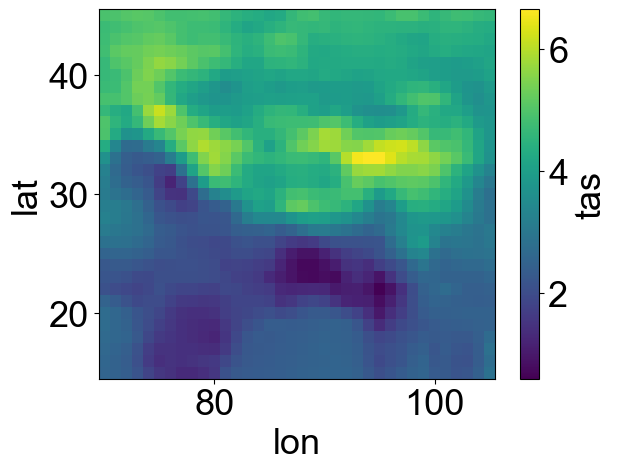

In [20]:
ensemble_mean.plot()

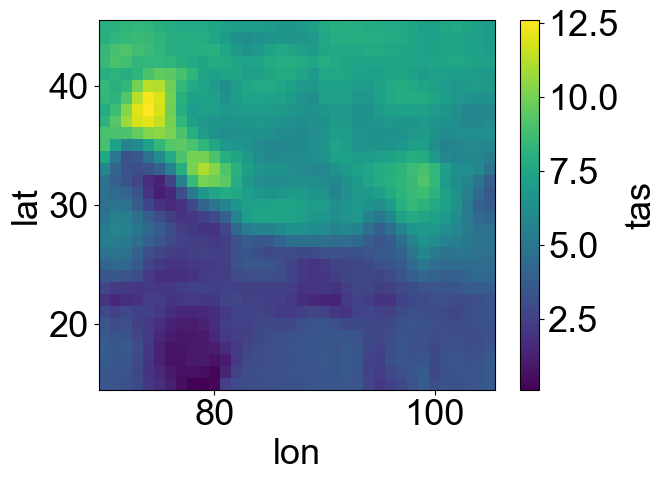

In [21]:
ECEarth3.plot()

In [22]:
def get_proxy_anom(proxy_tas, proxy_tas_err):
    
    modern_tas = -6.5
    modern_tas_err = 0.5

    diff = proxy_tas - modern_tas
    
    diff_error = np.sqrt((proxy_tas_err**2 + modern_tas_err**2))
    
    return diff, diff_error


TF4 = get_proxy_anom(-3.545450960301788, 2.1159317323287277)
TF3 = get_proxy_anom(3.479886914148422, 2.327051158843666)
TF2= get_proxy_anom(-1.5735021089202461, 2.7707701268556457)
TF1 = get_proxy_anom(-1.5227118466322878, 2.7707701268556457)
HS = get_proxy_anom(-0.5134366590254451, 2.928164458474908)

# pollen_maat = 0.564342833257348
# pollen_maat_error = 1.5380999999999996

# pollen = get_proxy_anom(pollen_maat, pollen_maat_error)
print(TF1[0],
      TF2[0],
      TF3[0],
      TF4[0],
      HS[0])

print(TF1[1],
      TF2[1],
      TF3[1],
      TF4[1],
      HS[1])

4.977288153367712 4.926497891079753 9.979886914148421 2.954549039698212 5.986563340974555
2.8155225262596733 2.8155225262596733 2.380161149140043 2.1742049341944862 2.9705465988392863


In [23]:
# proxy_tas = -5.987313085851578
# proxy_maat_std =  5.184630177967461

# obs_tas_modern = -6.5 #deg C annual T
# modern_maat_std = 0.5

# diff_proxy = proxy_tas - obs_tas_modern
# diff_obs_error = np.sqrt((proxy_maat_std**2 + modern_maat_std**2)/4)
# print(diff_proxy)


# ######

# tf4proxy_tas = -3.545450960301788
# tf4proxy_maat_std = 4.673318447807921

# tf4diff_proxy = tf4proxy_tas - obs_tas_modern
# tf4diff_obs_error = np.sqrt((proxy_maat_std**2 + modern_maat_std**2)/4)

# print(tf4diff_proxy)

# # proxy_upper = diff_proxy + diff_obs_error
# # proxy_lower = diff_proxy - diff_obs_error
# # print(diff_proxy, proxy_upper, proxy_lower )

# HS_proxy_tas = -0.5134366590254451
# HS_proxy_maat_std = 6.545553197282132

# diff_hs = HS_proxy_tas - obs_tas_modern
# diff_hs_obs_error = np.sqrt((HS_proxy_maat_std**2 + modern_maat_std**2)/4)
# print(diff_hs)

In [24]:
# import numpy as np
# import matplotlib.pyplot as plt
# import xarray as xr
# from scipy.ndimage import gaussian_filter
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# import matplotlib.colors as mcolors
# from matplotlib.cm import ScalarMappable
# import matplotlib.ticker as mticker

# # Define lat/lon boundaries
# upper_lat = 42
# lower_lat = 18
# left_lon = 75
# right_lon = 100

# # Assuming datasets contains your model data
# datasets = [CESM, ECEarth3, GISS, HadGEM3, IPSL, NorESM]
# model_names = ['CESM', 'EC-Earth3', 'GISS', 'HadGEM3', 'IPSL', 'NorESM']

# # Print data range for each dataset to check for valid values
# for i, dataset in enumerate(datasets):
#     print(f"Dataset {model_names[i]} range: {dataset.min().item()} to {dataset.max().item()}")

# # Apply Gaussian smoothing and store smoothed data
# sigma = 1  # Standard deviation for Gaussian kernel
# smoothed_datasets = [
#     xr.DataArray(
#         gaussian_filter(dataset, sigma=sigma), 
#         dims=['lat', 'lon'], 
#         coords={'lat': dataset['lat'], 'lon': dataset['lon']}
#     )
#     for dataset in datasets
# ]

# # Define the levels for the colorbar as whole numbers
# data_min = -3  # Adjust this as needed based on the data range
# data_max = 13 # Adjust this as needed based on the data range
# levels = np.arange(data_min, data_max + 1, step=1)

# # Create a BoundaryNorm object with specified levels
# norm = mcolors.BoundaryNorm(boundaries=levels, ncolors=256)

# # Create a ScalarMappable object with the normalization and colormap
# cmap = 'YlOrRd'
# sm = ScalarMappable(cmap=cmap, norm=norm)

# # Set global font properties
# plt.rcParams['font.size'] = 24
# plt.rcParams['font.family'] = 'Arial'

# # Create a plot grid with a specific projection
# fig, axs = plt.subplots(2, 3, figsize=(25, 20), subplot_kw={'projection': ccrs.PlateCarree()})
# plt.subplots_adjust(hspace=-0.25, wspace=0.1)
# axs = axs.flatten()

# # Define the location and size of the pie scatter point
# # scatter_point_lon = -120.102744
# # scatter_point_lat = 41.524151
# radius = 0.4  # Adjust as needed

# # Define the extent (left_lon, right_lon, lower_lat, upper_lat)
# extent = [left_lon, right_lon, lower_lat, upper_lat]

# # Define the values for each wedge in the pie
# wedge_values = [diff_proxy, diff_hs]  # Replace with actual values

# # Latitude and Longitude intervals
# lat_interval = 2
# lon_interval = 2

# # When plotting each dataset based on model names
# for i, (ax, (dataset, name)) in enumerate(zip(axs, zip(smoothed_datasets, model_names))):
#     ax.set_extent(extent, crs=ccrs.PlateCarree())

#     pcm = ax.contourf(
#         dataset.lon, 
#         dataset.lat, 
#         dataset, 
#         levels=levels, 
#         cmap=cmap, 
#         norm=norm,
#         transform=ccrs.PlateCarree()
#     )

#     # Add features to each subplot
#     ax.coastlines()
#     ax.add_feature(cfeature.BORDERS, linewidth=0.5)
#     ax.add_feature(cfeature.STATES, linewidth=0.5)
#     ax.set_title(name)

#     # Overlay the watershed boundary
#     target_watershed_projected = target_watershed.to_crs(ax.projection)
#     target_watershed_projected.boundary.plot(ax=ax, color='k', linewidth=1)

#     # Add the wedges to the scatter point
#     current_start_angle = start_angle
#     for value, angle in zip(wedge_values, angles):
#         color = sm.to_rgba(value)  # Map the value to a color
#         wedge = mpatches.Wedge(
#             center=(scatter_point_lon, scatter_point_lat),
#             r=radius,
#             theta1=current_start_angle,
#             theta2=current_start_angle + angle,
#             facecolor=color,
#             edgecolor='k',
#             transform=ccrs.Geodetic(),
#             zorder=10
#         )
#         ax.add_patch(wedge)
#         current_start_angle += angle
   
#     # Add gridlines with specific labels
#     gl = ax.gridlines(draw_labels=True, linestyle='--', color='gray', alpha = 0.5)
#     gl.right_labels = False
#     gl.top_labels = False

#     # Customize the gridline labels
#     gl.xlocator = mticker.FixedLocator(np.arange(left_lon, right_lon + 1, lon_interval))
#     gl.ylocator = mticker.FixedLocator(np.arange(lower_lat, upper_lat + 3, lat_interval))

#     # Add latitude labels to the first column
#     if i % 3 == 0:
#         gl.left_labels = True
#     else:
#         gl.left_labels = False

#     # Add longitude labels to the bottom row
#     if i >= 12:
#         gl.bottom_labels = True
#     else:
#         gl.bottom_labels = False


# # Add a vertical colorbar to the right of the subplots
# cbar_ax = fig.add_axes([0.25, 0.92, 0.526, 0.025])  # [left, bottom, width, height]
# cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal', ticks=levels)
# cbar.ax.tick_params(labelsize=24)  # Set the tick label size

# # plt.savefig('Santi_pmip.png', dpi = 300, bbox_inches = 'tight')
# plt.show()


Global data range across all models: -2.46710205078125 to 12.5970458984375
Adjusted color scale limits: -3.0 to 13.0
CESM2 TAS at (35.9, 94.05): 4.41°C
EC-Earth3-LR TAS at (35.9, 94.05): 6.54°C
GISS-E2-1-G TAS at (35.9, 94.05): 1.94°C
PlioMIP2 Ensemble TAS at (35.9, 94.05): 4.32°C
HadGEM3-GC31-LL TAS at (35.9, 94.05): 5.79°C
IPSL-CM6A-LR TAS at (35.9, 94.05): 5.16°C
NorESM1-F TAS at (35.9, 94.05): 2.08°C


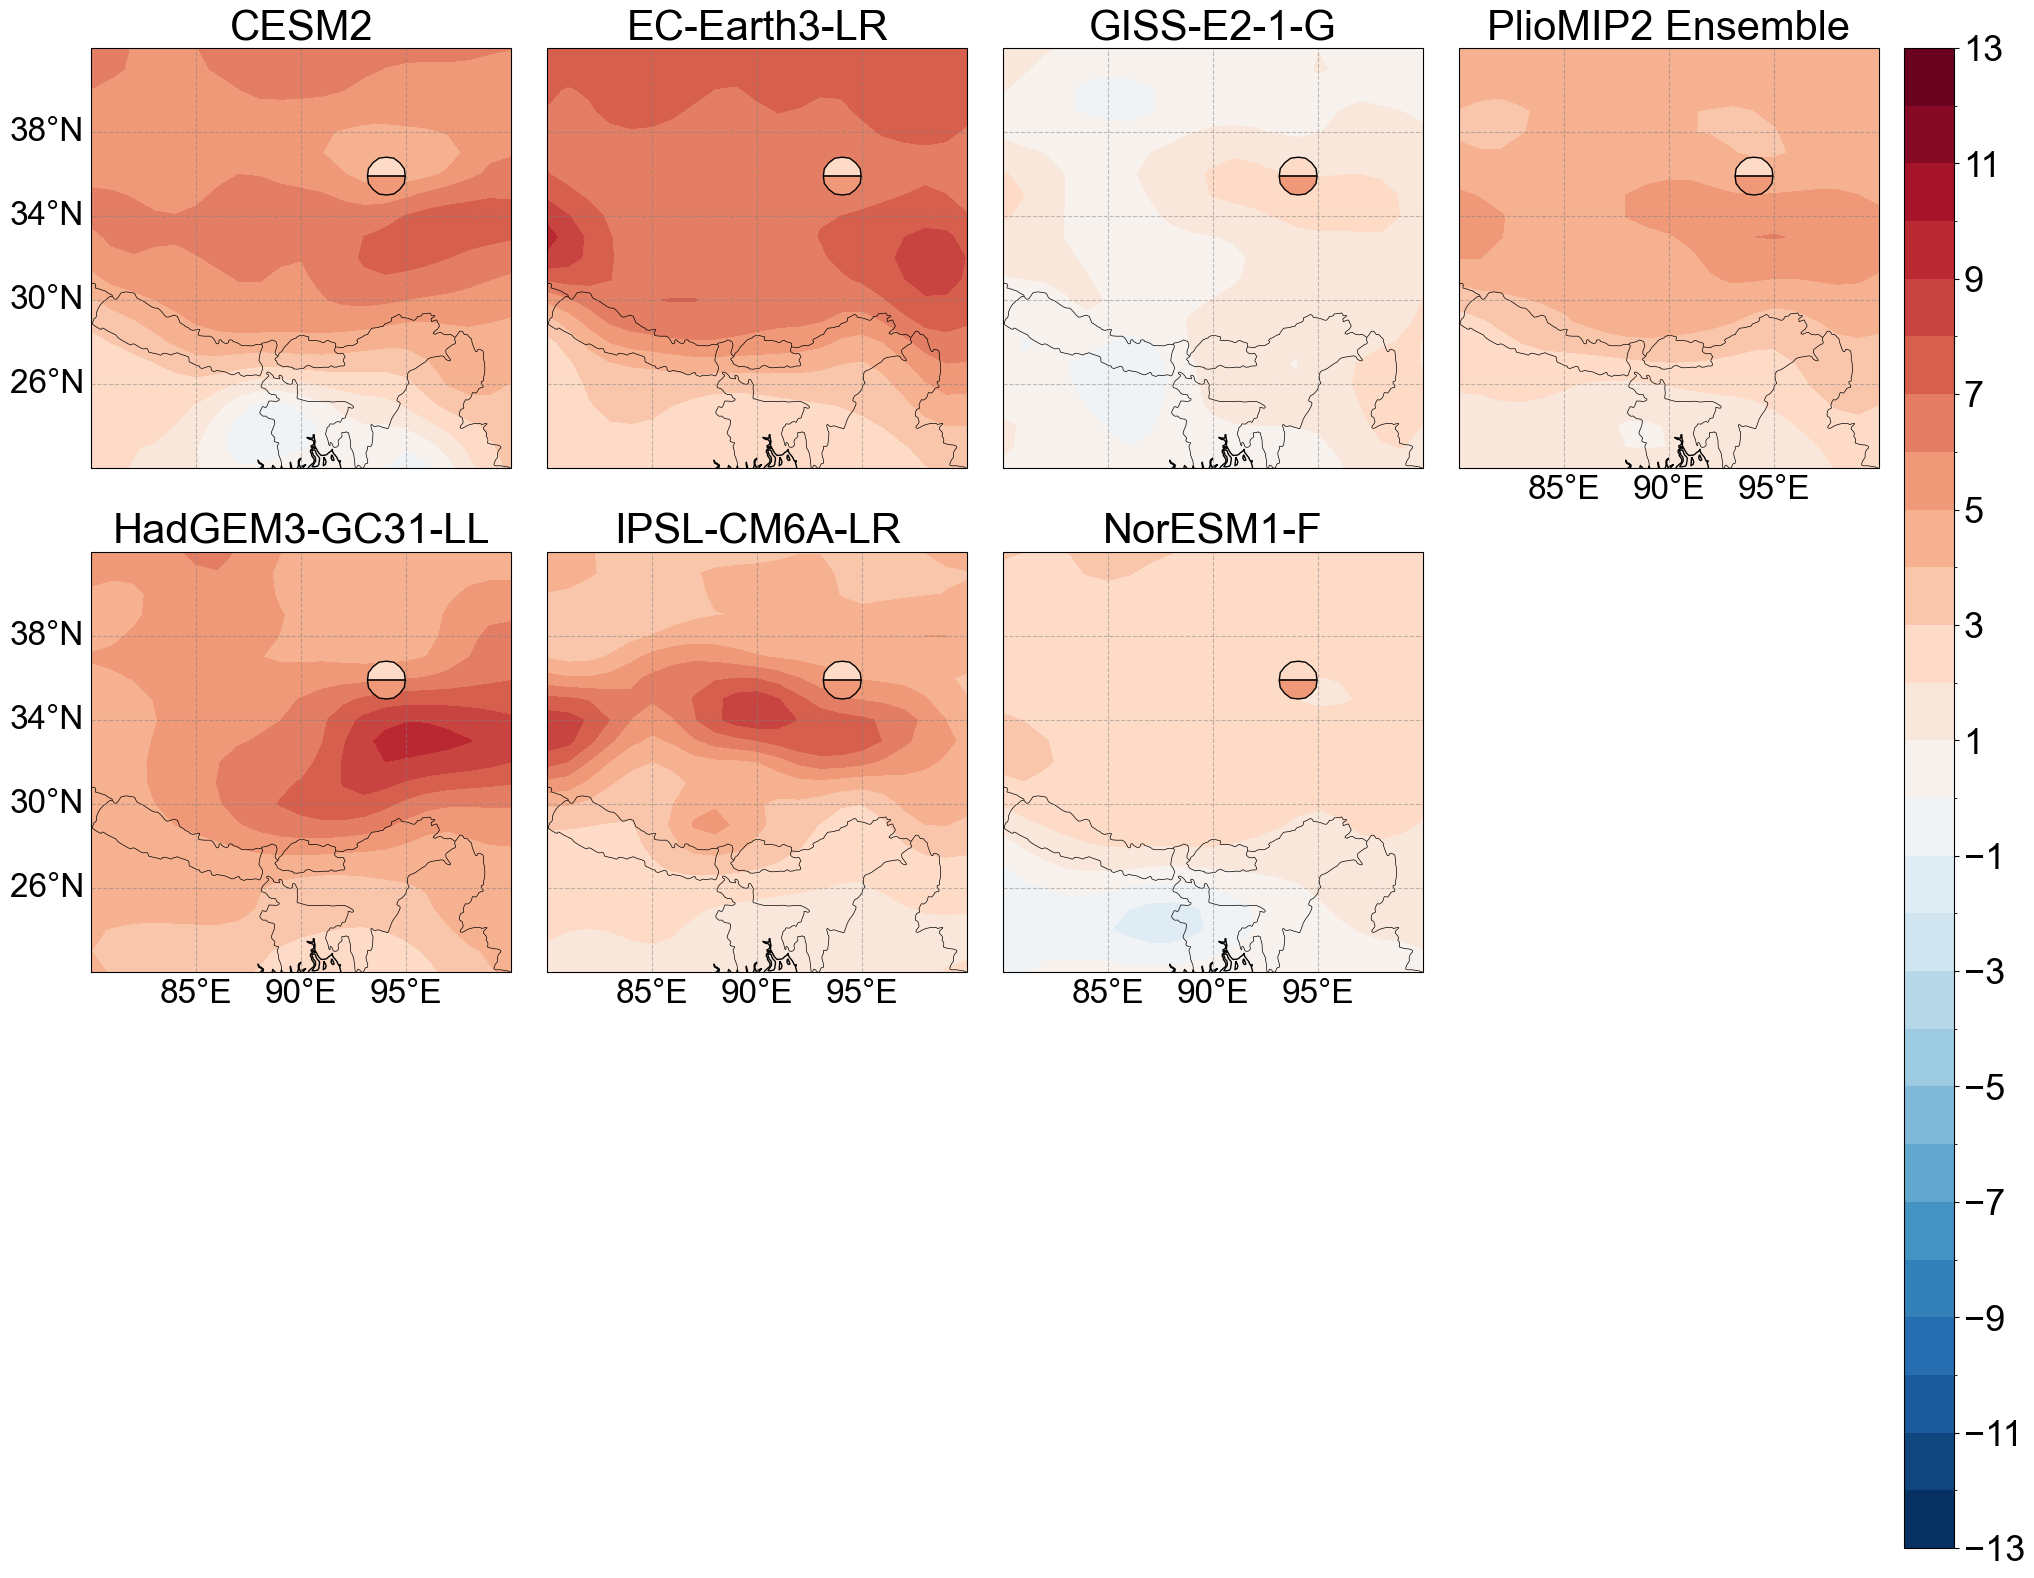

In [26]:
# Define lat/lon boundaries
upper_lat = 42
lower_lat = 22
left_lon = 80
right_lon = 100

# Assuming datasets contains your model data
datasets = [CESM, ECEarth3, GISS,ensemble_mean, HadGEM3, IPSL, NorESM,]
model_names = ['CESM2', 'EC-Earth3-LR', 'GISS-E2-1-G', 'PlioMIP2 Ensemble', 'HadGEM3-GC31-LL', 'IPSL-CM6A-LR', 'NorESM1-F']

# Calculate global min and max across all datasets
global_min = min(dataset.min().item() for dataset in datasets)
global_max = max(dataset.max().item() for dataset in datasets)

print(f"Global data range across all models: {global_min} to {global_max}")

# Adjust color scale limits
data_min = np.floor(global_min)  # Round down
data_max = np.ceil(global_max)   # Round up

print(f"Adjusted color scale limits: {data_min} to {data_max}")

# Apply Gaussian smoothing
sigma = 1  # Standard deviation for Gaussian kernel
smoothed_datasets = [
    xr.DataArray(
        gaussian_filter(dataset, sigma=sigma), 
        dims=['lat', 'lon'], 
        coords={'lat': dataset['lat'], 'lon': dataset['lon']}
    )
    for dataset in datasets
]

# Define levels for the colorbar
levels = np.arange(-13, 13 + 1, step=1)
norm = mcolors.BoundaryNorm(boundaries=levels, ncolors=256)
cmap = 'RdBu_r'
sm = ScalarMappable(cmap=cmap, norm=norm)

# Set global font properties
plt.rcParams['font.size'] = 24
plt.rcParams['font.family'] = 'Arial'

# Create a plot grid with specific projection
fig, axs = plt.subplots(2, 4, figsize=(25, 12), subplot_kw={'projection': ccrs.PlateCarree()})
plt.subplots_adjust(hspace=0.2, wspace = -0.2)
axs = axs.flatten()

# Define scatter point and pie chart settings
scatter_point_lon = 94.05
scatter_point_lat = 35.9
radius = 0.9  # Adjust as needed

tf4 = TF4[0]
hs = HS[0]

# Replace with actual values for the wedges
wedge_values = [tf4, hs]  # Replace with actual values
angles = [180, 180]  # Three equal segments of 120 degrees each

extent = [left_lon, right_lon, lower_lat, upper_lat]
lat_interval = 4
lon_interval = 5

# Plot each smoothed dataset
for i, (ax, (dataset, name)) in enumerate(zip(axs, zip(smoothed_datasets, model_names))):
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    
    # Plot contourf
    pcm = ax.contourf(
        dataset.lon, dataset.lat, dataset, levels=levels, cmap=cmap, norm=norm,
        transform=ccrs.PlateCarree()
    )

    # Add features
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.set_title(name, fontsize=30)

    # Print TAS value at the scatter lat/lon for each model
    tas_value = dataset.sel(lat=scatter_point_lat, lon=scatter_point_lon, method='nearest').item()
    print(f"{name} TAS at ({scatter_point_lat}, {scatter_point_lon}): {tas_value:.2f}°C")
    
    # Add pie chart wedges split into thirds
    start_angle = 0
    for value, angle in zip(wedge_values, angles):
        color = sm.to_rgba(value)
        wedge = mpatches.Wedge(
            center=(scatter_point_lon, scatter_point_lat), r=radius,
            theta1=start_angle, theta2=start_angle + angle,
            facecolor=color, edgecolor='k', transform=ccrs.Geodetic(), zorder=10
        )
        ax.add_patch(wedge)
        start_angle += angle

    # Add gridlines with custom font properties for labels
    gl = ax.gridlines(draw_labels=True, linestyle='--', color='gray', alpha=0.5)
    gl.right_labels = False
    gl.top_labels = False
    gl.xlocator = mticker.FixedLocator(np.arange(left_lon, right_lon + 1, lon_interval))
    gl.ylocator = mticker.FixedLocator(np.arange(lower_lat, upper_lat + 5, lat_interval))
    gl.xlabel_style = {'size': 24}
    gl.ylabel_style = {'size': 24}
    gl.left_labels = (i % 4 == 0)
    gl.bottom_labels = (i >= 3)

# Add vertical colorbar to the right of the plots
cbar_ax = fig.add_axes([0.88, -0.37, 0.02, 1.25])  # [left, bottom, width, height]

axs[7].axis('off')

# Specify only every other tick for labeling
cbar_ticks = levels[::2]
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='vertical', ticks=cbar_ticks)
cbar.ax.tick_params(labelsize=26)

plt.savefig('Cheng_pliomip2.png', dpi=300, bbox_inches='tight')
plt.show()


Value at (35.65, 94.05) for this dataset: 3.5059814453125
Value at (35.65, 94.05) for this dataset: 6.39337158203125
Value at (35.65, 94.05) for this dataset: 1.879913330078125
Value at (35.65, 94.05) for this dataset: 5.451202392578125
Value at (35.65, 94.05) for this dataset: 5.136871337890625
Value at (35.65, 94.05) for this dataset: 2.01318359375


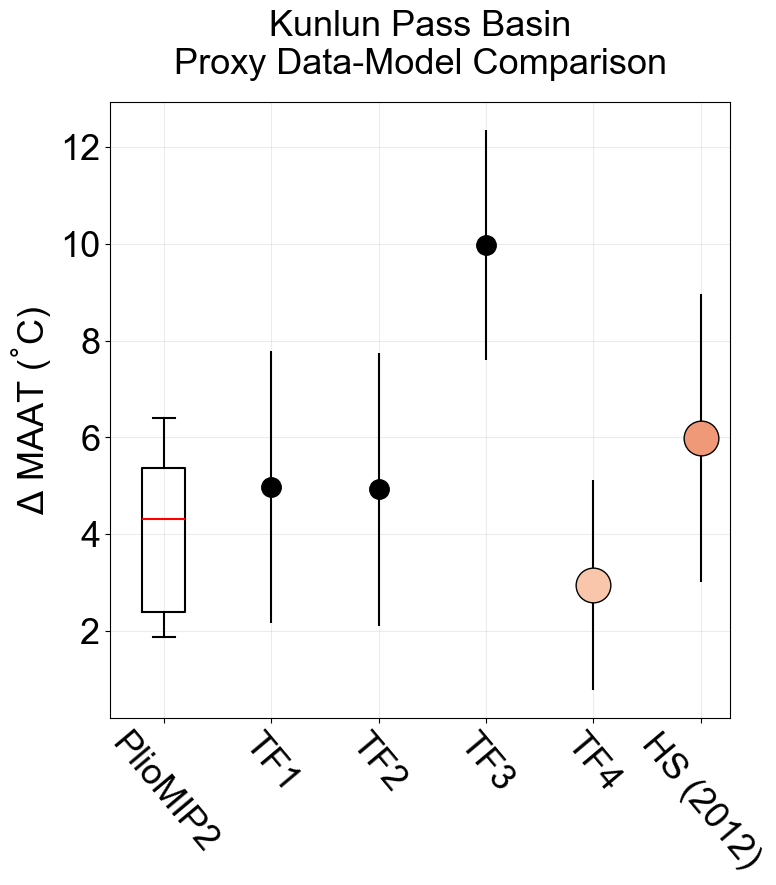

In [35]:
# Assuming datasets contains your model data
datasets = [CESM, ECEarth3, GISS,  HadGEM3, IPSL, NorESM]

# Coordinates for the scatter point
scatter_point_lon = 94.05
scatter_point_lat = 35.65

# Initialize an empty list to store the data values at the scatter point for each dataset
scatter_data = []

# Loop through each dataset and get the value at the scatter point
for dataset in datasets:
    value_at_point = dataset.sel(lat=scatter_point_lat, lon=scatter_point_lon, method='nearest').item()
    scatter_data.append(value_at_point)
    print(f"Value at ({scatter_point_lat}, {scatter_point_lon}) for this dataset: {value_at_point}")

# Create boxplot with scatter data
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 26  # Set the font size

# Colors
green = '#009988'
red = plt.cm.Dark2(1)

# Create figure and axes
fig, ax = plt.subplots(figsize=(8, 8))

# Create boxplot with custom line widths for the box, whiskers, caps, and median
ax.boxplot(
    scatter_data, 
    widths=0.4, 
    boxprops=dict(linewidth=1.5, color='black'),
    whiskerprops=dict(linewidth=1.5, color='black'),
    capprops=dict(linewidth=1.5, color='black'),
    medianprops=dict(linewidth=1.5, color='red')
)

# Scatter values for `diff_proxy` and `diff_hs` on top of the boxplots
ax.errorbar(2, TF1[0], yerr=TF1[1], fmt='o', ms=14, color='k', mec='k', ecolor='k', zorder=5)
ax.errorbar(3, TF2[0], yerr=TF2[1], fmt='o', ms=14, color='k', mec='k', ecolor='k', zorder=5)
ax.errorbar(4, TF3[0], yerr=TF3[1], fmt='o', ms=14, color='k', mec='k', ecolor='k', zorder=5)
ax.errorbar(5, TF4[0], yerr=TF4[1], fmt='o', ms=25, color='#f9c6ac', mec='k', ecolor='k', zorder=5)
ax.errorbar(6, HS[0], yerr=HS[1], fmt='o', ms=25, color='#ef9979', mec='k', ecolor='k', zorder=5)
# ax.errorbar(7, pollen[0], yerr=pollen[1], fmt='o', ms=14, color='w', mec='k', ecolor='k', zorder=5)

# Set titles and labels
ax.set_title('Kunlun Pass Basin\nProxy Data-Model Comparison', pad=20, fontsize=26)
ax.set_ylabel('Δ MAAT ($^\degree$C)')

# Set x-ticks positions and labels
ax.set_xticks([1, 2, 3, 4, 5, 6])
ax.set_xticklabels(['PlioMIP2', 'TF1', 'TF2', 'TF3', 'TF4', 'HS (2012)'], rotation=310)

# Optional: add grid lines for better readability
ax.grid(True, color='gray', alpha=0.15)

# Save and show the plot
plt.savefig('Cheng_pliomip2_spread.png', dpi=300, bbox_inches='tight')
plt.show()


In [39]:
diff = TF4[1] - HS[1]
diff

-0.7963416646448

In [30]:
import pandas as pd


datasets = [CESM, ECEarth3, GISS, ensemble_mean, HadGEM3, IPSL, NorESM]

# Coordinates for the scatter point
scatter_point_lon = 94.05
scatter_point_lat = 35.65

# Initialize an empty list to store the data values at the scatter point for each dataset
scatter_data_ss = []

# Loop through each dataset and get the value at the scatter point
for dataset in datasets:
    value_at_point = dataset.sel(lat=scatter_point_lat, lon=scatter_point_lon, method='nearest').item()
    scatter_data_ss.append(value_at_point)
    print(f"Value at ({scatter_point_lat}, {scatter_point_lon}) for this dataset: {value_at_point}")

    
pd.DataFrame({'model': model_names, 'm': scatter_data_ss}).to_csv('kunlun_pass_m.csv')
scatter_data

Value at (35.65, 94.05) for this dataset: 3.5059814453125
Value at (35.65, 94.05) for this dataset: 6.39337158203125
Value at (35.65, 94.05) for this dataset: 1.879913330078125
Value at (35.65, 94.05) for this dataset: 4.06342077255249
Value at (35.65, 94.05) for this dataset: 5.451202392578125
Value at (35.65, 94.05) for this dataset: 5.136871337890625
Value at (35.65, 94.05) for this dataset: 2.01318359375


[3.5059814453125,
 6.39337158203125,
 1.879913330078125,
 5.451202392578125,
 5.136871337890625,
 2.01318359375]